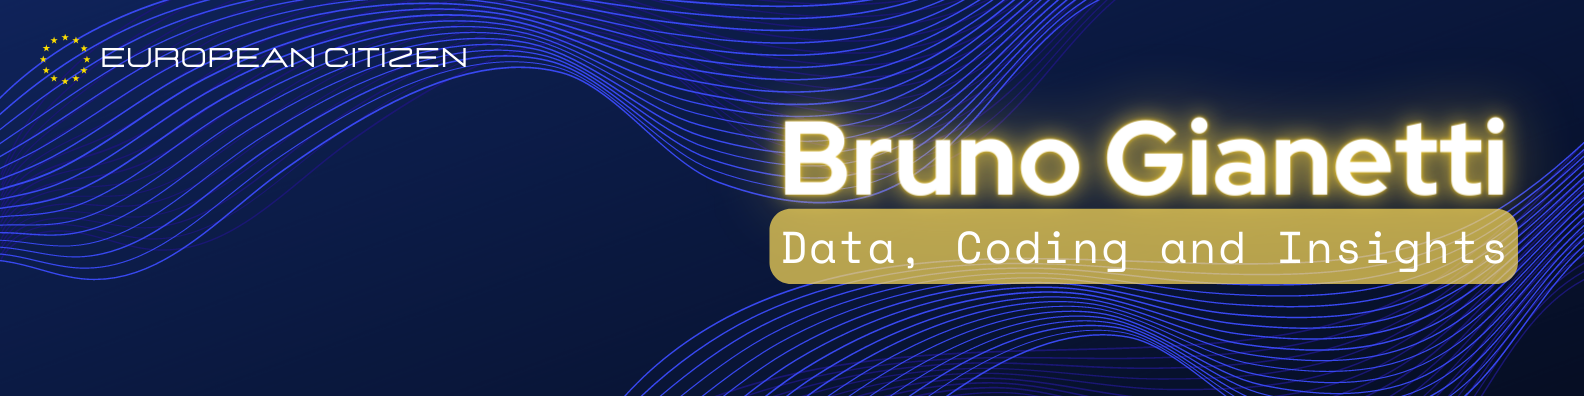

---
# Explorando biblioteca Riskfolio
--- 

## Importando e Instalando bibliotecas

In [5]:
pip install riskfolio-lib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
import riskfolio as rp
import riskfolio.Portfolio as pf
warnings.filterwarnings('ignore')

In [8]:
#In sample

#Período
inicio = '2016-01-01'
fim = '2022-08-30'

#Seleção dos ativos da carteira
ativos = ['PETR4.SA', 'VALE3.SA', 'BBDC4.SA', 'ITSA4.SA', 'ABEV3.SA', 'WEGE3.SA', 'IVVB11.SA']

#Peso da carteira anteriormente

peso_in = np.array([0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.10])

In [9]:
#Download dos dados

carteira = yf.download(ativos, start=inicio, end=fim)['Adj Close']
carteira.head()

[*********************100%***********************]  7 of 7 completed


,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2016-01-04 00:00:00-02:00,13.508917,6.386365,3.078627,83.110001,3.027317,8.419853,5.020995
2016-01-05 00:00:00-02:00,13.720856,6.409574,3.129936,83.000000,2.943592,8.307057,5.264500
2016-01-06 00:00:00-02:00,13.587413,6.318727,3.157924,82.099998,2.820208,7.696636,5.144460
2016-01-07 00:00:00-02:00,13.226336,6.190875,3.111278,81.000000,2.758516,7.238818,4.996988
2016-01-08 00:00:00-02:00,13.399025,6.069749,3.111278,80.000000,2.762923,6.993322,4.972980


In [10]:
#Estração dos parâmetros

#Retornos
retorno_carteira = carteira.pct_change().dropna()

#Covariância
cov_in = retorno_carteira.cov()

In [11]:
retorno_carteira

,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2016-01-05 00:00:00-02:00,0.015689,0.003634,0.016666,-0.001324,-0.027656,-0.013396,0.048497
2016-01-06 00:00:00-02:00,-0.009726,-0.014173,0.008942,-0.010843,-0.041916,-0.073482,-0.022802
2016-01-07 00:00:00-02:00,-0.026574,-0.020234,-0.014771,-0.013398,-0.021875,-0.059483,-0.028666
2016-01-08 00:00:00-02:00,0.013056,-0.019565,0.000000,-0.012346,0.001597,-0.033914,-0.004805
2016-01-11 00:00:00-02:00,-0.015817,-0.028270,-0.011994,-0.007500,-0.028708,-0.028463,-0.022759
...,...,...,...,...,...,...,...
2022-08-23 00:00:00-03:00,0.001297,0.007239,0.000000,-0.015695,0.031780,0.064110,-0.005181
2022-08-24 00:00:00-03:00,0.023316,-0.005647,-0.003219,0.005574,0.005981,-0.032189,-0.000347
2022-08-25 00:00:00-03:00,0.001266,0.007228,0.009688,0.012076,-0.010702,0.019426,0.005558


In [12]:
cov_in

,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
ABEV3.SA,0.000321,0.000194,0.000167,0.000016,0.000209,0.000111,0.000157
BBDC4.SA,0.000194,0.000534,0.000380,0.000043,0.000448,0.000254,0.000189
ITSA4.SA,0.000167,0.000380,0.000375,0.000038,0.000361,0.000191,0.000177
IVVB11.SA,0.000016,0.000043,0.000038,0.000881,0.000063,0.000066,0.000024
PETR4.SA,0.000209,0.000448,0.000361,0.000063,0.000975,0.000423,0.000254
VALE3.SA,0.000111,0.000254,0.000191,0.000066,0.000423,0.000828,0.000156
WEGE3.SA,0.000157,0.000189,0.000177,0.000024,0.000254,0.000156,0.000517


In [13]:
peso_in = pd.DataFrame(data={'peso_in': peso_in}, index=ativos)
peso_in

,peso_in
PETR4.SA,0.15
VALE3.SA,0.15
BBDC4.SA,0.15
ITSA4.SA,0.15
ABEV3.SA,0.15
WEGE3.SA,0.15
IVVB11.SA,0.10


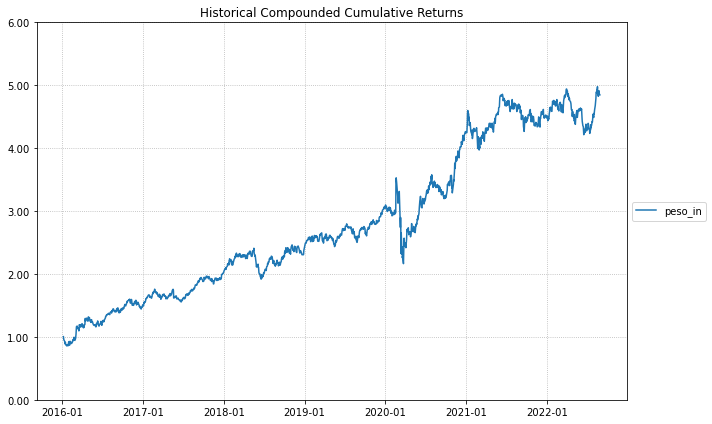

In [14]:
ax = rp.plot_series(returns=retorno_carteira, w=peso_in, cmap='tab20', height=6, width=10, ax=None)

In [15]:
#Parâmetros out-of-sample

out_inicio = '2022-09-01'
out_fim = '2023-01-20'

#Download dos dados
carteira_out = yf.download(ativos, start=out_inicio, end=out_fim)['Adj Close']

#Calcular o retorno
retorno_out = carteira_out.pct_change().dropna()

#Matriz covariância
cov_out = retorno_out.cov()

[*********************100%***********************]  7 of 7 completed


In [16]:
cov_out

,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
ABEV3.SA,0.000255,0.000182,0.000164,-0.000066,0.000170,0.000069,0.000146
BBDC4.SA,0.000182,0.000722,0.000372,-0.000120,0.000299,0.000137,0.000170
ITSA4.SA,0.000164,0.000372,0.000313,-0.000129,0.000252,0.000068,0.000193
IVVB11.SA,-0.000066,-0.000120,-0.000129,0.000303,-0.000163,0.000013,-0.000101
PETR4.SA,0.000170,0.000299,0.000252,-0.000163,0.000891,0.000158,0.000106
VALE3.SA,0.000069,0.000137,0.000068,0.000013,0.000158,0.000568,0.000136
WEGE3.SA,0.000146,0.000170,0.000193,-0.000101,0.000106,0.000136,0.000494


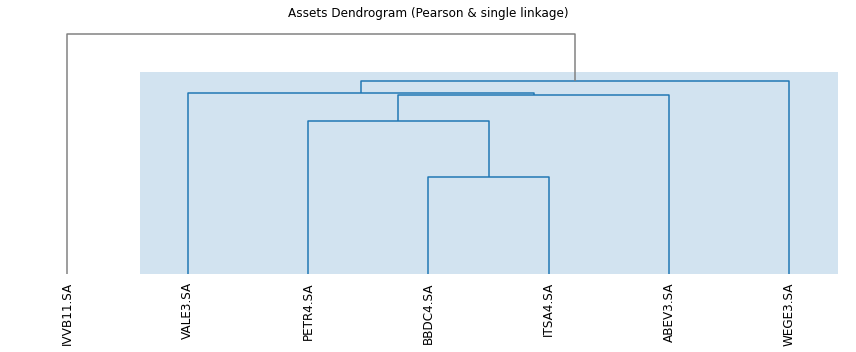

In [17]:
#Plotando Clusters

ax = rp.plot_dendrogram(returns=retorno_carteira,
                       codependence='pearson',
                       linkage='single',
                       k=None,
                       max_k=10,
                       leaf_order=True,
                       ax=None)

## Modelo de otimização

### Hierarchical Risk Parity

In [18]:
pd.options.display.float_format = '{:.4%}'.format

portfolio = rp.HCPortfolio(returns=retorno_carteira)

model = 'HRP'
codependence = 'pearson'
rm = 'MV'
rf = 0 # pode passar CDI
leaf_order = True

pesos = portfolio.optimization(model = model,
                               codependence = codependence,
                               rm = rm,
                               rf = rf,
                               leaf_order = leaf_order)
display(pesos)

,weights
ABEV3.SA,22.8984%
BBDC4.SA,10.3000%
ITSA4.SA,14.6544%
IVVB11.SA,16.2134%
PETR4.SA,9.9759%
VALE3.SA,11.7466%
WEGE3.SA,14.2112%


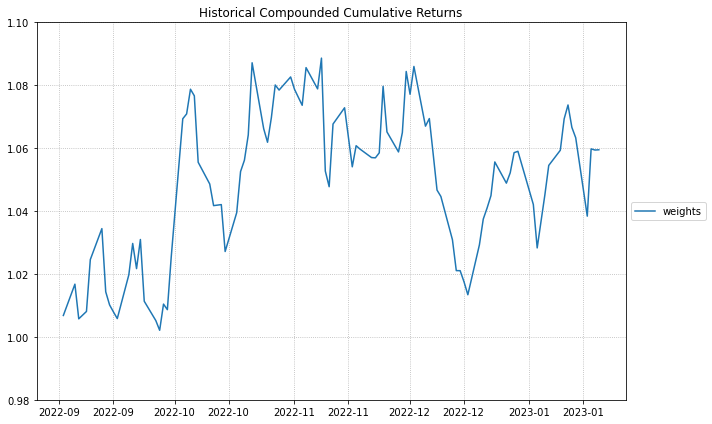

In [19]:
# Retorno Acumulado out of sample

fig_2, ax_2 = plt.subplots()

rp.plot_series(returns=retorno_out, w=pesos, cmap='tab20', height=6, width = 10, ax=None)

plt.savefig('cum_ret.png')

### Gráficos de distribuição dos pesos

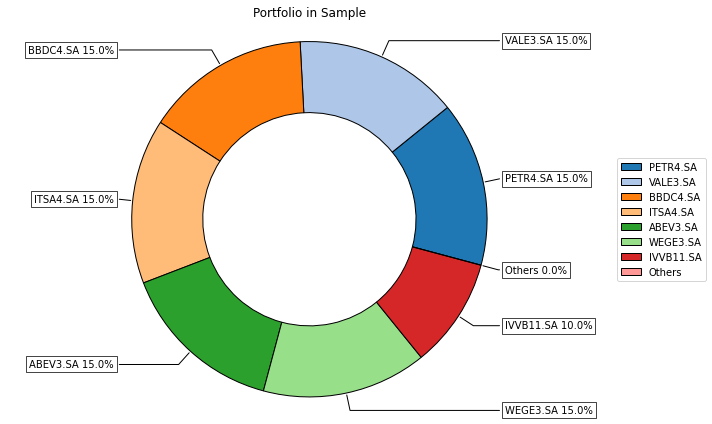

In [20]:
#Pesos in sample

fig_3, ax_3 = plt.subplots()

rp.plot_pie(w=peso_in, title='Portfolio in Sample', height=6, width=10, cmap='tab20', ax=None)

plt.savefig('pf_weights_in.png')

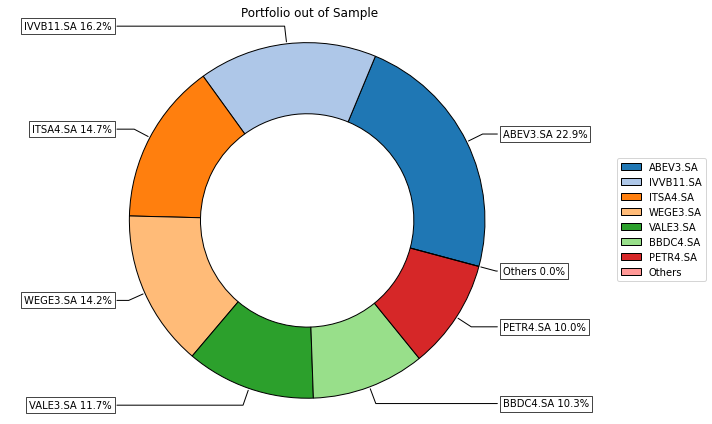

In [21]:
#Pesos out-of-sample

fig_4, ax_4 = plt.subplots()

rp.plot_pie(w=pesos, title='Portfolio out of Sample', height=6, width=10, cmap='tab20', ax=None)

plt.savefig('pf_weights_out.png')

### Contribuição de risco por ativo

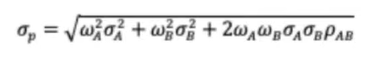

In [22]:
#Parâmetros do portfolio otimizado

media_retorno = portfolio.mu
covariancia = portfolio.cov
retornos = portfolio.returns

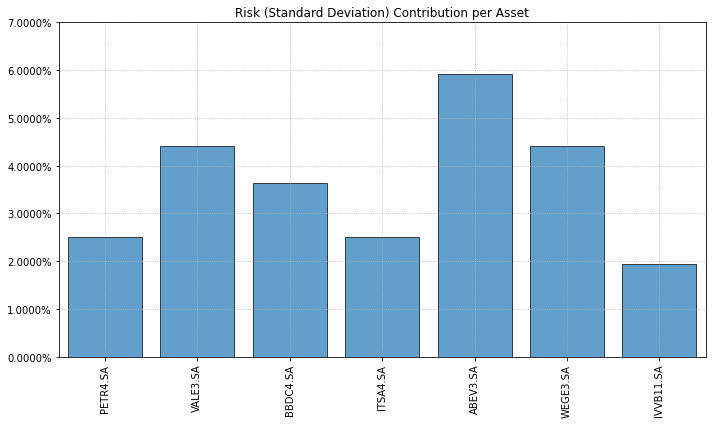

In [23]:
#in Sample

fig_5, ax_5 = plt.subplots()

rp.plot_risk_con(w=peso_in, cov=cov_in, returns=retorno_carteira, rm=rm, alpha=0.05, color='tab:blue',
                height=6, width=10, t_factor=252, ax=None)

plt.savefig('risk_cont_in.png')

In [24]:
cov_in

,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
ABEV3.SA,0.0321%,0.0194%,0.0167%,0.0016%,0.0209%,0.0111%,0.0157%
BBDC4.SA,0.0194%,0.0534%,0.0380%,0.0043%,0.0448%,0.0254%,0.0189%
ITSA4.SA,0.0167%,0.0380%,0.0375%,0.0038%,0.0361%,0.0191%,0.0177%
IVVB11.SA,0.0016%,0.0043%,0.0038%,0.0881%,0.0063%,0.0066%,0.0024%
PETR4.SA,0.0209%,0.0448%,0.0361%,0.0063%,0.0975%,0.0423%,0.0254%
VALE3.SA,0.0111%,0.0254%,0.0191%,0.0066%,0.0423%,0.0828%,0.0156%
WEGE3.SA,0.0157%,0.0189%,0.0177%,0.0024%,0.0254%,0.0156%,0.0517%


In [25]:
cov_out

,ABEV3.SA,BBDC4.SA,ITSA4.SA,IVVB11.SA,PETR4.SA,VALE3.SA,WEGE3.SA
ABEV3.SA,0.0255%,0.0182%,0.0164%,-0.0066%,0.0170%,0.0069%,0.0146%
BBDC4.SA,0.0182%,0.0722%,0.0372%,-0.0120%,0.0299%,0.0137%,0.0170%
ITSA4.SA,0.0164%,0.0372%,0.0313%,-0.0129%,0.0252%,0.0068%,0.0193%
IVVB11.SA,-0.0066%,-0.0120%,-0.0129%,0.0303%,-0.0163%,0.0013%,-0.0101%
PETR4.SA,0.0170%,0.0299%,0.0252%,-0.0163%,0.0891%,0.0158%,0.0106%
VALE3.SA,0.0069%,0.0137%,0.0068%,0.0013%,0.0158%,0.0568%,0.0136%
WEGE3.SA,0.0146%,0.0170%,0.0193%,-0.0101%,0.0106%,0.0136%,0.0494%


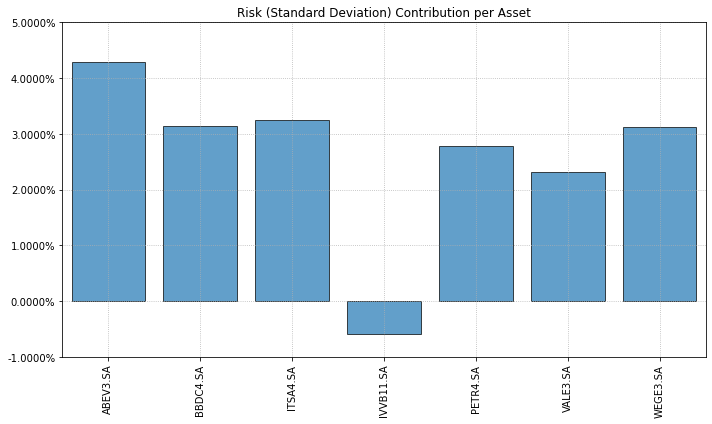

In [26]:
#Gráfico out of Sample

fig_6, ax_6 = plt.subplots()

rp.plot_risk_con(w=pesos, cov=cov_out, returns=retorno_out, rm=rm, alpha=0.05, color='tab:blue',
                height=6, width=10, t_factor=252, ax=None)

plt.savefig('risk_cont_out.png')

### Histograma de retornos do portfolio

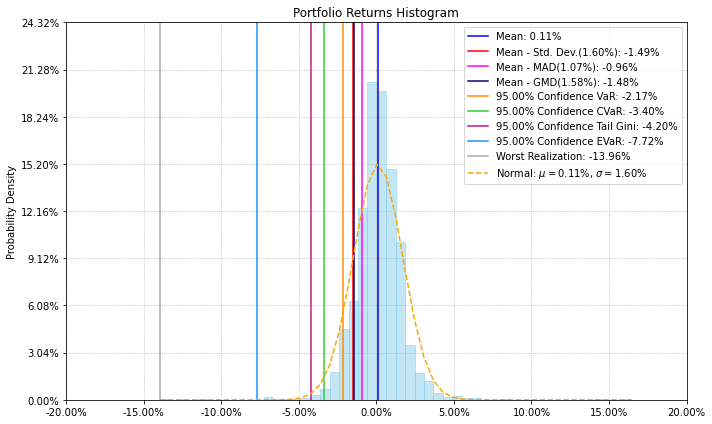

In [27]:
fig_7, ax_7 = plt.subplots()

rp.plot_hist(returns=retorno_carteira, w=peso_in, alpha=0.05, bins=50, height=6, width=10, ax=None)

plt.savefig('pf_returns_in.png')

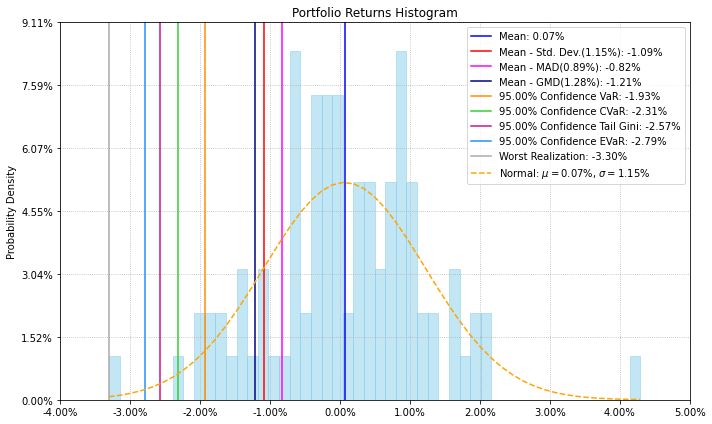

In [28]:
fig_8, ax_8 = plt.subplots()

rp.plot_hist(returns=retorno_out, w=pesos, alpha=0.05, bins=50, height=6, width=10, ax=None)

plt.savefig('pf_returns_out.png')

### Tabela de medida de risco

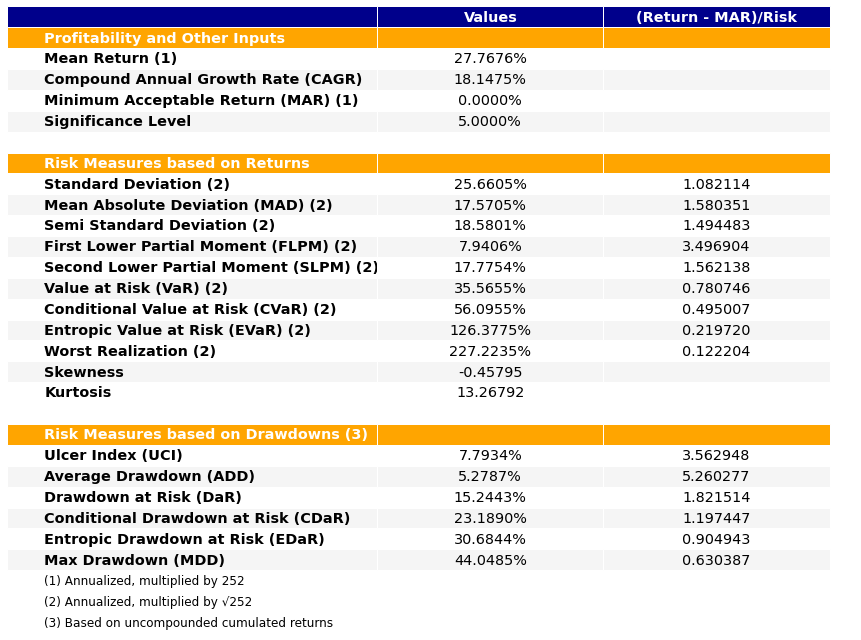

In [34]:
fig_9, ax_9 = plt.subplots()

rp.plot_table(returns=retorno_carteira, w=peso_in, MAR=0, alpha=0.05, ax=None)

plt.savefig('table_in.png')

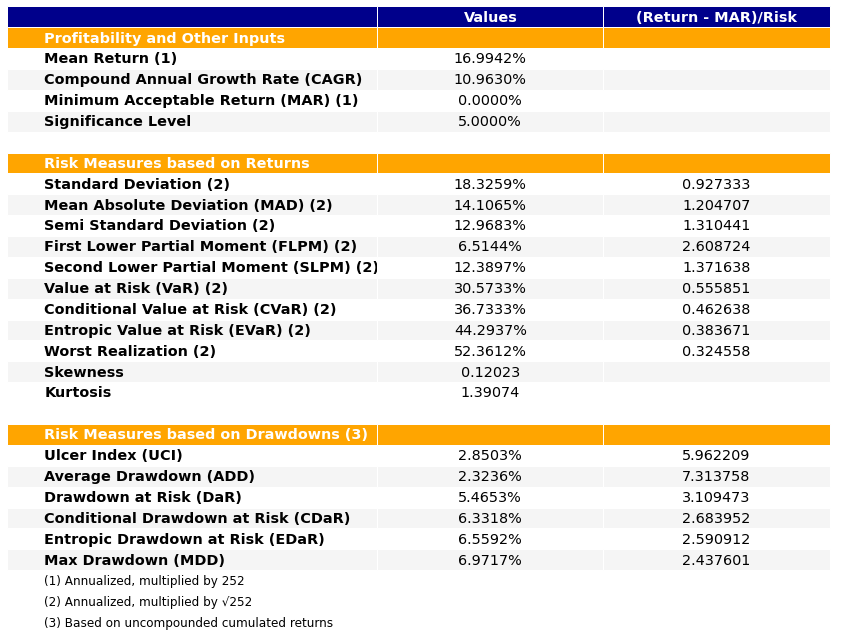

In [35]:
fig_10, ax_10 = plt.subplots()

rp.plot_table(returns=retorno_out, w=pesos, MAR=0, alpha=0.05, ax=None)

plt.savefig('table_out.png')

### Construindo o relatório em pdf

In [36]:
pip install FPDF

Note: you may need to restart the kernel to use updated packages.


In [37]:
from fpdf import FPDF

In [39]:
# Setup básico do PDF
pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 16)

# Layout do pdf
pdf.cell(40, 10, 'Diagnóstico da sua Carteira')

# Quebra de Linha
pdf.ln(20)

# Tabela Performance
pdf.cell(20, 7, 'Como sua carteira performou de {} até {}'.format(inicio, fim))
pdf.ln(8)
pdf.image('table_in.png', w=180, h=200)
pdf.ln(60)

pdf.cell(20, 7, 'Como sua carteira performou de {} até {}'.format(out_inicio, out_fim))
pdf.ln(8)
pdf.image('table_out.png', w=180, h=200)
pdf.ln(60)

pdf.cell(20, 7, 'Retorno Acumulado da Carteira de {} até {}'.format(out_inicio, out_fim))
pdf.ln(8)
pdf.image('cum_ret.png', w=120, h=70)
pdf.ln(10)

pdf.cell(20, 7, 'Pesos Carteira Atual')
pdf.ln(8)
pdf.image('pf_weights_in.png', w=100, h=60)
pdf.ln(10)

pdf.cell(20, 7, 'Pesos Carteira Otimizada')
pdf.ln(8)
pdf.image('pf_weights_out.png', w=100, h=60)
pdf.ln(30)

# Contribuição de risco por ativo
pdf.cell(20, 7, 'Contribuição de risco por ativo de {} até {}'.format(inicio, fim))
pdf.ln(15)
pdf.image('risk_cont_in.png', w=150, h=80)
pdf.ln(20)
pdf.cell(20, 7, 'Contribuição de risco por ativo de {} até {}'.format(out_inicio, out_fim))
pdf.ln(15)
pdf.image('risk_cont_out.png', w=150, h=80)
pdf.ln(80)

# Histograma dos retornos
pdf.cell(20, 7, 'Histograma de retornos de {} até {}'.format(inicio, fim))
pdf.ln(15)
pdf.image('pf_returns_in.png', w=150, h=80)
pdf.ln(20)

pdf.cell(20, 7, 'Histograma de retornos de {} até {}'.format(out_inicio, out_fim))
pdf.ln(15)
pdf.image('pf_returns_in.png', w=150, h=80)
pdf.ln(20)

# Disclaimer

pdf.set_font('Times', '', 6)
pdf.cell(5, 5, 'Relatório construído com a biblioteca RiskFolio https://riskfolio-lib.readthedocs.io/en/latest/')

# Output do PDF file

pdf.output('diagnostico_de_carteria.pdf', 'F')

''